Q2.Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv('ToyotaCorolla.csv')

In [3]:
# Select relevant columns and rename them
selected_columns = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
df = df[selected_columns]
df = df.rename(columns={'Age_08_04': 'Age', 'cc': 'CC', 'Quarterly_Tax': 'Tax'})

In [4]:
# Display the first few rows of a DataFrame
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
# Display the last few rows of a DataFrame
df.tail()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


Inference drawn from `df.info()`:

Dataset: 1,436 entries, 9 columns.
Data Types: All columns have the same data type, 'int64.'
Missing Values: No missing values in any column.
Suitable for regression analysis, particularly predicting car prices using various features.

In [7]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


Inference drawn from `df.describe()`:

- Car prices vary widely, with an average of approximately $10,731.
- Car ages span from 1 to 80 months, with an average of around 56 months.
- Mileage ranges from 1 to 243,000 kilometers, with an average of about 68,533 kilometers.
- Horsepower varies from 69 to 192 HP, with an average of approximately 101.5 HP.
- Engine capacities vary from 1,300 to 16,000 CC, averaging around 1,577 CC.
- Most cars have 4 doors and 5 gears.
- Quarterly tax amounts range from 19 to 283 units, averaging around 87.12 units.
- Car weights vary from 1,000 to 1,615 kilograms, with an average of about 1,072.46 kilograms.

In [8]:
# Find and display the duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

     Price  Age     KM   HP    CC  Doors  Gears  Tax  Weight
113  24950    8  13253  116  2000      5      5  234    1320


In [9]:
# Remove duplicates
df = df.drop_duplicates()

In [10]:
# Reset the index
df = df.reset_index(drop=True)

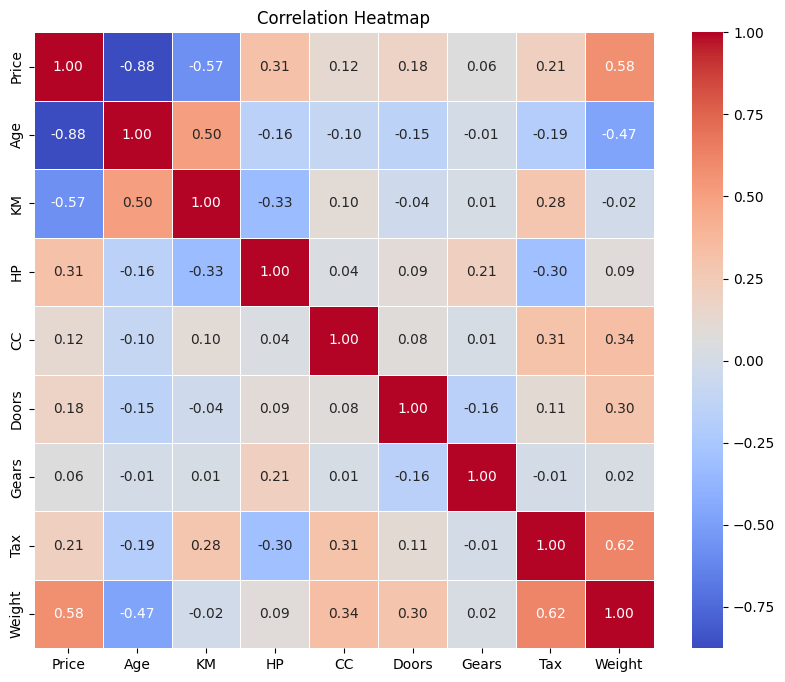

In [11]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Inference drawn from Heatmap:

- Price is strongly positively correlated with HP and CC, suggesting that more powerful and larger engine cars tend to be pricier.
- Price is moderately positively correlated with age, indicating that newer cars tend to be more expensive.
- Price is moderately negatively correlated with KM, implying that higher mileage cars tend to be less expensive.
- A strong positive correlation exists between HP and CC, indicating that more horsepower often corresponds to larger engines.

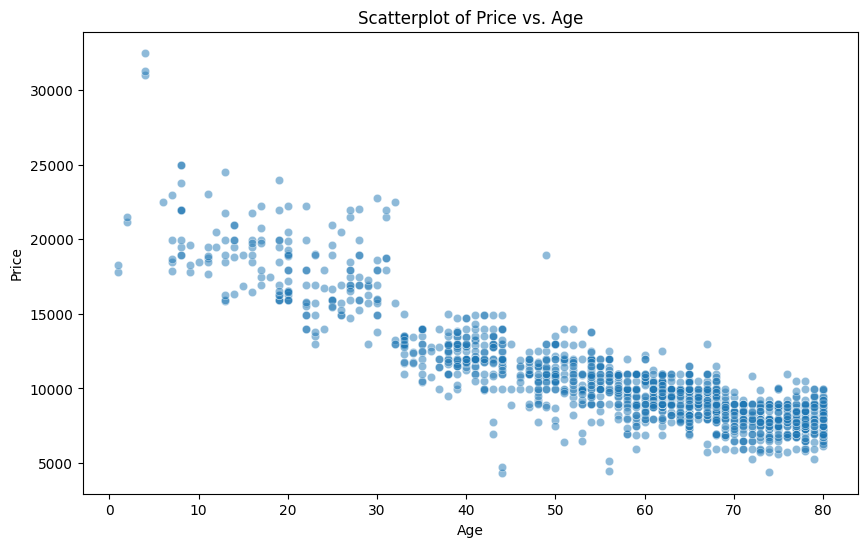

In [12]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Price', alpha=0.5)
plt.title('Scatterplot of Price vs. Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

Inference drawn:

The scatterplot of price vs. age demonstrates a clear negative correlation, indicating that as a car's age increases, its price generally decreases.

There's substantial variability in the data, signifying significant price differences among cars of the same age.

Notably:
- Average prices decline as cars ages.
- Older cars exhibit a wider price range than newer ones.
- Some older cars remain relatively expensive.
- A few newer cars are surprisingly affordable.

In [13]:
# Create the initial model
model = sm.OLS(df["Price"], sm.add_constant(df[["Age", "KM", "HP", "CC", "Doors", "Gears", "Tax", "Weight"]])).fit()

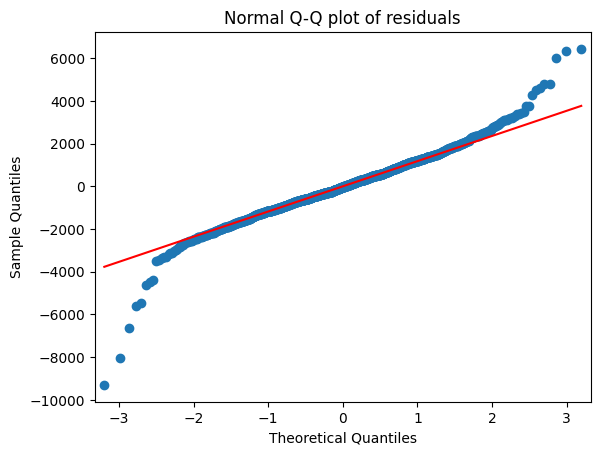

In [14]:
# Q-Q plot for normality of residuals
sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Inference drawn from Q-Q plot for normality of residuals:

The normal Q-Q plot of residuals shows that the residuals are not normally distributed. This means that the results of the model should be interpreted with caution.

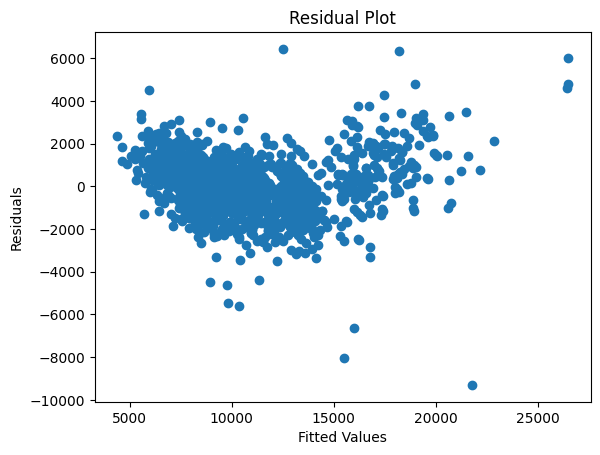

In [15]:
# Residual plot for homoscedasticity
fitted_values = model.fittedvalues
residuals = model.resid
plt.scatter(fitted_values, residuals)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Inference drawn from Residual plot for homoscedasticity:

The residual plot shows a positive relationship between the residuals and fitted values. This suggests that the model may not be adequately capturing the non-linear relationship between the independent and dependent variables.

In [16]:
influence = OLSInfluence(model)
cooks_distance = influence.cooks_distance[0]  # Access the first element of the tuple
# Identify influential points (usually with Cook's distance > 1)
influential_points = df[cooks_distance > 1]

In [17]:
# Remove influential points and rebuild the model
df = df[cooks_distance <= 1].reset_index(drop=True)
model = sm.OLS(df["Price"], sm.add_constant(df[["Age", "KM", "HP", "CC", "Doors", "Gears", "Tax", "Weight"]])).fit()

In [18]:
# Display the model statistics
print("Model Summary:")
print(model.summary())

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1264.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:14:58   Log-Likelihood:                -12270.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.018e+04   1398.103     

Inference drawn from Model Summary:

The model has a high R-squared value and all of the individual coefficients are statistically significant, suggesting that it is a good fit for the data.

In [19]:
#Split the Data
X = df[['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Tax', 'Weight']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
#Predict Prices
y_pred = model.predict(X_test)

In [22]:
#Evaluate the Model using Mean Absolute Error (MAE):
mae = mean_absolute_error(y_test, y_pred)

In [23]:
#Evaluate the Model using Mean Squared Error (MSE):
mse = mean_squared_error(y_test, y_pred)

In [24]:
#Evaluate the Model using Root Mean Squared Error (RMSE): 
rmse = np.sqrt(mse)

In [25]:
#Evaluate the Model using R-squared (R²): 
r2 = r2_score(y_test, y_pred)

In [26]:
#model's performance:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 934.47
Mean Squared Error (MSE): 1532830.52
Root Mean Squared Error (RMSE): 1238.08
R-squared (R²): 0.86


Inference drawn from model's performance:

The model is relatively accurate, with an R-squared of 0.86, meaning it explains around 86% of the variance in car prices. Overall, the model is performing well in predicting car prices.